___Import Required Libraries___

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

___Load and Split the Dataset___    
Load the breast cancer dataset and split it into training, validation, and testing sets:Load the dataset and split it into training, validation, and testing sets (80:10:10 split) using seed 5 for reproducibility:

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=5)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=5)

___Implement Logistic Regression___   
Implement Logistic Regression using different solvers ('newton-cg', 'lbfgs', 'liblinear') and evaluate accuracy:

In [3]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
for solver in solvers:
    model = LogisticRegression(solver=solver)
    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, predictions)
    print(f'Solver: {solver}, Accuracy: {accuracy}')

Solver: newton-cg, Accuracy: 0.9649122807017544
Solver: lbfgs, Accuracy: 0.9649122807017544
Solver: liblinear, Accuracy: 0.9649122807017544


/home/knight/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


___Train Logistic Regression with Different Penalties___   
Train Logistic Regression using different penalties ('l1', 'l2', 'none') and display coefficients and accuracy:

In [4]:
penalties = ['l1', 'l2', 'none']

# Using 'liblinear' solver for 'l1' and 'l2' penalties
for penalty in penalties[:2]:
    model = LogisticRegression(penalty=penalty, solver='liblinear')
    model.fit(X_train, y_train)
    coefficients = model.coef_
    predictions = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, predictions)
    print(f"{'-'*40}\nPenalty: {penalty}\n\nCoefficients: \n{coefficients}\n\nAccuracy: {accuracy:.4f}")

# Using 'lbfgs' solver for 'none' penalty
model = LogisticRegression(penalty='none', solver='lbfgs')
model.fit(X_train, y_train)
coefficients = model.coef_
predictions = model.predict(X_valid)
accuracy = accuracy_score(y_valid, predictions)
print(f"{'-'*40}\nPenalty: none\n\nCoefficients: \n{coefficients}\n\nAccuracy: {accuracy:.4f}")

----------------------------------------
Penalty: l1

Coefficients: 
[[ 3.15026273  0.08882245 -0.16446846 -0.01058279  0.          0.
   0.          0.          0.          0.          0.          1.97429953
   0.         -0.09702453  0.          0.          0.          0.
   0.          0.          0.55749914 -0.38696178 -0.04569665 -0.01972672
   0.          0.         -4.3704048   0.          0.          0.        ]]

Accuracy: 0.9825
----------------------------------------
Penalty: l2

Coefficients: 
[[ 1.89758500e+00  1.02466522e-01 -1.22282160e-01  1.81037301e-03
  -1.15795041e-01 -3.36345080e-01 -5.50455360e-01 -2.84036578e-01
  -1.56756060e-01 -1.46005945e-02  5.38919304e-02  1.48307240e+00
   1.64548712e-01 -9.85279428e-02 -1.39717079e-02 -4.07326532e-03
  -6.55970442e-02 -3.43255449e-02 -2.45649822e-02  3.81939507e-03
   1.73110402e+00 -3.61820685e-01 -1.15483305e-01 -2.82036454e-02
  -2.15185374e-01 -8.92214242e-01 -1.36498177e+00 -5.25828114e-01
  -4.82613406e-01 -8.75521

/home/knight/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/knight/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/knight/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


___Vary L1 Penalty and Compare Coefficients___   
Vary the L1 penalty over the specified range and compare feature coefficients:

In [5]:
l1_penalties = [0.1, 0.25, 0.75, 0.9]
for penalty in l1_penalties:
    model = LogisticRegression(penalty='l1', C=1/penalty, solver='liblinear')
    model.fit(X_train, y_train)
    coefficients = model.coef_
    print(f"{'-'*40}\nL1 Penalty: {penalty}\n\nCoefficients:\n {coefficients}")

----------------------------------------
L1 Penalty: 0.1

Coefficients:
 [[ 1.06752939e+00  1.18252811e-01  5.84502137e-02 -1.54157720e-02
   0.00000000e+00  0.00000000e+00 -4.68115612e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  3.80782898e+00
  -5.42066171e-01 -1.23812308e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.81257613e-01 -5.89233476e-01  1.61545355e-01 -2.05131196e-02
  -1.17146746e+01  6.29620994e-01 -5.75466236e+00 -3.16546307e+01
  -7.23170976e+00  0.00000000e+00]]
----------------------------------------
L1 Penalty: 0.25

Coefficients:
 [[  3.80330083   0.15006066  -0.2288708   -0.02175828   0.
    0.           0.           0.           0.           0.
    0.           3.5140403   -0.25876831  -0.12174664   0.
    0.           0.           0.           0.           0.
    0.          -0.55107687   0.11759896  -0.01768373   0.
    0.          -6.69683495 -13.68249452  -3.97074447   0.  

/home/knight/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/knight/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


___Estimate Average Naive Bayes Accuracy___    
Estimate the average accuracy of the Naive Bayes algorithm using 5-fold cross-validation and plot a bar graph:

Average Naive Bayes Accuracy: 0.9385188635305075


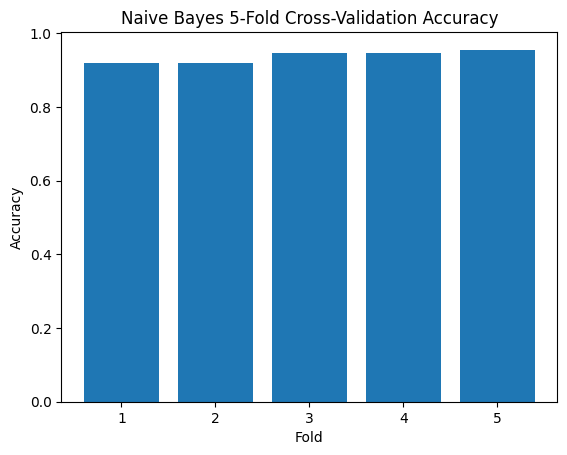

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
scores = cross_val_score(nb_model, X, y, cv=5)

average_accuracy = scores.mean()
print(f'Average Naive Bayes Accuracy: {average_accuracy}')

# Plot the bar graph
plt.bar(range(1, 6), scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Naive Bayes 5-Fold Cross-Validation Accuracy')
plt.show()
